<a href="https://colab.research.google.com/github/yerinsally/2022_PythonML/blob/main/13_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기와 데이터셋 나누기

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/Fvote.csv', encoding='utf-8')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          211 non-null    int64  
 1   gender_female       211 non-null    int64  
 2   gender_male         211 non-null    int64  
 3   region_Chungcheung  211 non-null    int64  
 4   region_Honam        211 non-null    int64  
 5   region_Others       211 non-null    int64  
 6   region_Sudo         211 non-null    int64  
 7   region_Youngnam     211 non-null    int64  
 8   edu                 211 non-null    float64
 9   income              211 non-null    float64
 10  age                 211 non-null    float64
 11  score_gov           211 non-null    float64
 12  score_progress      211 non-null    float64
 13  score_intention     211 non-null    float64
 14  vote                211 non-null    int64  
 15  parties             211 non-null    int64  
dtypes: float

In [ ]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [ ]:
y=data[['vote']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

# 2. Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_estimators': range(100, 1000, 100), 
            'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 1000, 100)},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'max_features': 'log2', 'n_estimators': 900}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.651


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.792


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0        0.158791      0.008788  ...          0.998425          0.00315
1        0.285303      0.006143  ...          1.000000          0.00000
2        0.421728      0.008479  ...          1.000000          0.00000
3        0.570473      0.028697  ...          1.000000          0.00000
4        0.694463      0.016156  ...          1.000000          0.00000
5        0.821507      0.006761  ...          1.000000          0.00000
6        0.971818      0.009759  ...          1.000000          0.00000
7        1.119040      0.002431  ...          1.000000          0.00000
8        1.252528      0.031669  ...          1.000000          0.00000
9        0.143711      0.006517  ...          1.000000          0.00000
10       0.281065      0.010088  ...          1.000000          0.00000
11       0.414864      0.006878  ...          1.000000          0.00000
12       0.553302      0.010296  ...          1.000000          0.00000
13       0.689215      0.009608  ...          1.000000          0.00000
14       0.831349      0.014600  ...          1.000000          0.00000
15       0.970525      0.010541  ...          1.000000          0.00000
16       1.112657      0.021527  ...          1.000000          0.00000
17       1.250338      0.015370  ...          1.000000          0.00000
18       0.143250      0.007429  ...          1.000000          0.00000
19       0.275966      0.002296  ...          1.000000          0.00000
20       0.412977      0.003891  ...          1.000000          0.00000
21       0.556407      0.010002  ...          1.000000          0.00000
22       0.692158      0.004583  ...          1.000000          0.00000
23       0.826657      0.008965  ...          1.000000          0.00000
24       0.967881      0.010899  ...          1.000000          0.00000
25       1.104296      0.019657  ...          1.000000          0.00000
26       1.232869      0.010591  ...          1.000000          0.00000

[27 rows x 22 columns]

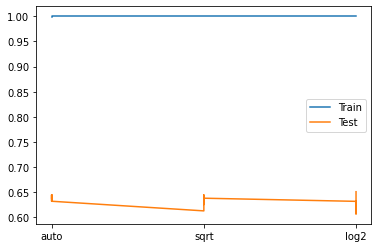

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

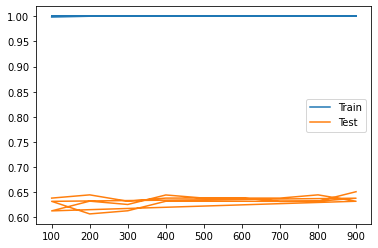

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc4b8d57890>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'max_features': 'auto', 'n_estimators': 180}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.651


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.792


In [ ]:
result_random = random_search.cv_results_

In [ ]:
pd.DataFrame(result_random)

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.265603      0.006864  ...               1.0              0.0
1       0.687258      0.008292  ...               1.0              0.0
2       0.871594      0.026141  ...               1.0              0.0
3       0.732504      0.012446  ...               1.0              0.0
4       1.020611      0.007787  ...               1.0              0.0
5       0.269882      0.005481  ...               1.0              0.0
6       0.827844      0.006521  ...               1.0              0.0
7       0.499405      0.006372  ...               1.0              0.0
8       0.603406      0.009132  ...               1.0              0.0
9       0.926459      0.011317  ...               1.0              0.0

[10 rows x 22 columns]

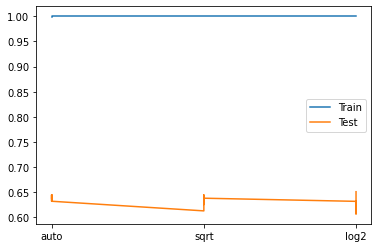

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

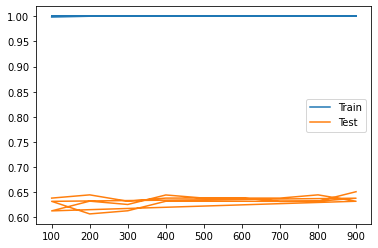

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Forest=RandomForestClassifier(max_features='auto', n_estimators=492)

In [ ]:
Forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=492)

In [ ]:
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.03003305 0.02891981 0.02555566 0.02335401 0.02390444 0.03306769
 0.02293213 0.07273851 0.08957464 0.10803805 0.12536141 0.12760521
 0.28891541]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

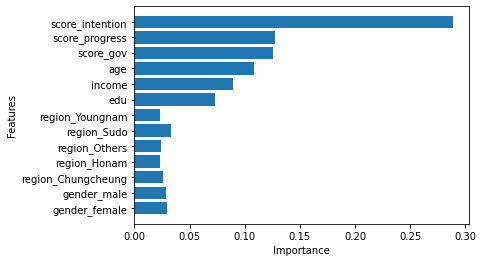

In [ ]:
def plot_feature_importances_forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_forest(Forest)

# 4. 모델평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Forest=RandomForestClassifier(max_features='auto', n_estimators=492)

In [ ]:
Forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=492)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred_train=Forest.predict(X_train)

In [ ]:
confusion_train=confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 48   0]
 [  0 110]]


In [ ]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[ 3 10]
 [ 5 35]]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1=f1_score(y_test, pred_test)

In [ ]:
print("f1 score:\n", f1)

f1 score:
 0.823529411764706


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport=classification_report(y_test, pred_test)

In [ ]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.38      0.23      0.29        13
           1       0.78      0.88      0.82        40

    accuracy                           0.72        53
   macro avg       0.58      0.55      0.55        53
weighted avg       0.68      0.72      0.69        53



# 5. 다중분류적용

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/G_ML_2/data/vote.csv', encoding='utf-8')

In [ ]:
data.head()

gender  region  edu  income  ...  score_progress  score_intention  vote  parties
0       1       4    3       3  ...               2              4.0     1        2
1       1       5    2       3  ...               4              3.0     0        3
2       1       3    1       2  ...               3              2.8     1        4
3       2       1    2       1  ...               4              2.6     1        1
4       1       1    1       2  ...               3              2.4     1        1

[5 rows x 10 columns]

In [ ]:
X=data[['gender', 'region', 'edu', 'income', 'age', 
        'score_gov', 'score_progress', 'score_intention']]

In [ ]:
y=data[['parties']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc4b8b7a210>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'max_features': 'sqrt', 'n_estimators': 570}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.456


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.509


In [ ]:
result_random = random_search.cv_results_

In [ ]:
pd.DataFrame(result_random)

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.691025      0.026748  ...          0.995251         0.003878
1       1.027578      0.004857  ...          0.995251         0.003878
2       1.092826      0.009969  ...          0.995251         0.003878
3       0.843609      0.052310  ...          0.995251         0.003878
4       0.936490      0.009887  ...          0.995251         0.003878
5       0.444733      0.088964  ...          0.995251         0.003878
6       0.487714      0.012395  ...          0.995251         0.003878
7       1.160148      0.012801  ...          0.995251         0.003878
8       0.802936      0.010401  ...          0.995251         0.003878
9       0.422820      0.005633  ...          0.995251         0.003878

[10 rows x 22 columns]

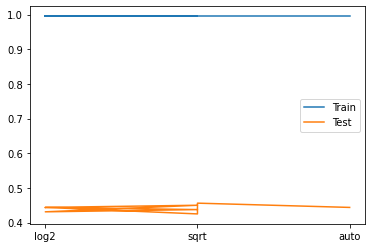

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_max_features'], 
         result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_max_features'], 
         result_random['mean_test_score'], label="Test")
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Forest=RandomForestClassifier(max_features='log2', n_estimators=478)

In [ ]:
Forest.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=478)

In [ ]:
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.05572418 0.11243917 0.07485585 0.10463282 0.08974363 0.17847768
 0.14113289 0.24299379]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

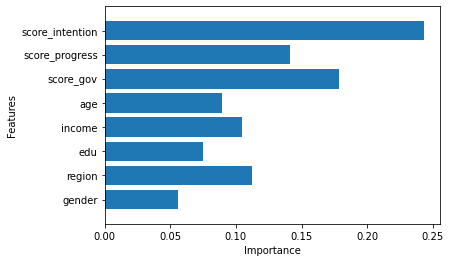

In [ ]:
def plot_feature_importances_Forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_Forest(Forest)

In [ ]:
from sklearn.metrics import confusion_matrix
pred_train=Forest.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[36  0  1  0]
 [ 0 37  0  0]
 [ 0  0 19  0]
 [ 0  0  0 65]]


In [ ]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[ 5  2  1  5]
 [ 1  9  2  4]
 [ 3  0  2  1]
 [ 1  2  1 14]]


In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred_test, average="micro" )
f2=f1_score(y_test, pred_test, average="macro" )

In [ ]:
print("micro f1 score:\n", f1)
print("macro f1 score:\n", f2)

micro f1 score:
 0.5660377358490566
macro f1 score:
 0.5138680659670165


In [ ]:
from sklearn.metrics import classification_report
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           1       0.50      0.38      0.43        13
           2       0.69      0.56      0.62        16
           3       0.33      0.33      0.33         6
           4       0.58      0.78      0.67        18

    accuracy                           0.57        53
   macro avg       0.53      0.51      0.51        53
weighted avg       0.57      0.57      0.56        53

